<a href="https://colab.research.google.com/github/sudar-coder321/Heart_Disease_Logistic-Regression_with_different_solvers/blob/main/Heart_Disease_SVM_Solvers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the essential Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
import mlxtend.evaluate as mlxe
import seaborn as sns
import cma
from sklearn.model_selection import GridSearchCV
%matplotlib inline

--> Loading The Dataset

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Finding The counts of Target Classification Values

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

1. Displaying Count Plot for Target Variable

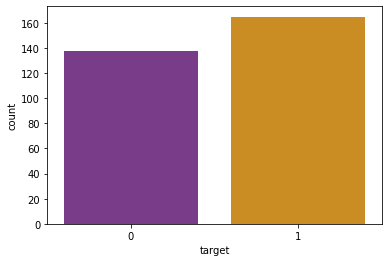

In [ ]:
sns.countplot(x="target", data=df, palette="CMRmap")
plt.show()

2. Displaying count plot of sex variable

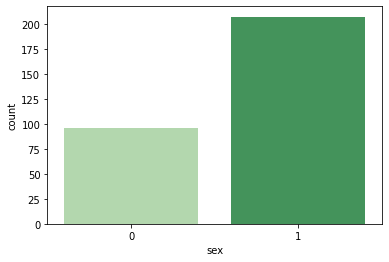

In [ ]:
sns.countplot(x="sex",data=df,palette='Greens')

3. Percentage of patients having or not having heart disease

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients who have a Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients who do not have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients who have a Heart Disease: 45.54%
Percentage of Patients who do not have Heart Disease: 54.46%


4.Percentage of Male and Female Patients

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


5. Frequency chart for the variable age

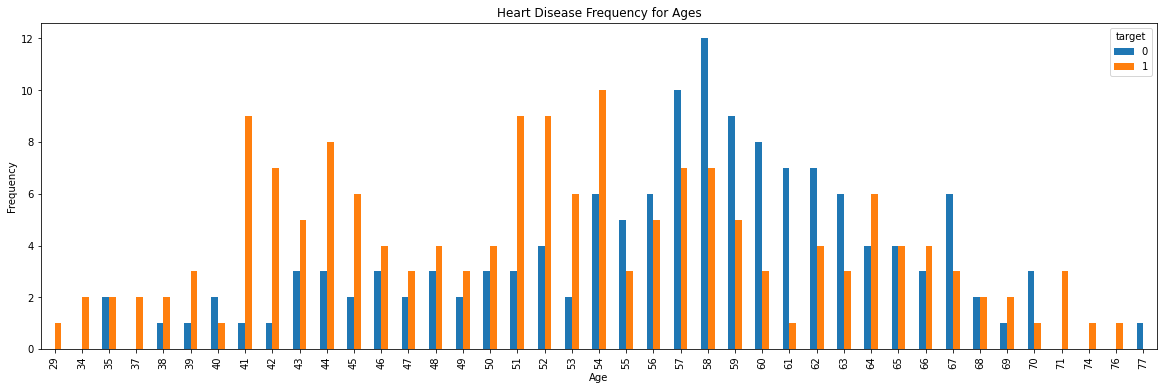

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

6. Creating Model for Logistic Regression

In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [ ]:
x_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


Normalizing the values

In [ ]:
temp1 = len(x_data.isnull())
temp2 = x_data.shape[0]
print(temp1)
print(temp2)

if(temp1==temp2):
  print("No null values present")

303
303
No null values present


In [ ]:
x_norm = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [ ]:
x_norm[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm,y,test_size = 0.2,random_state=74)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))
y_pred = lr.predict(x_test)
print("Precision:",precision_score(y_test, y_pred))

Test Accuracy 70.49%
Precision: 0.6829268292682927


In [ ]:
print(y_test.flatten())

[1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1]


7. Finding Loss of Initial model

In [ ]:
initial_loss = log_loss( y_test.flatten(),y_pred ,normalize=True, sample_weight=None, labels=None)
print("Initial loss: ",initial_loss)

Initial loss:  10.191940489753849


Checking which solver is best for performing to reduce the loss value of logistic regression

In [ ]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)

In [ ]:
clf = GridSearchCV(lr, params, cv=5)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  liblinear 0.852
  newton-cg 0.852
  lbfgs 0.852
  sag 0.852
  saga 0.852


8. Applying Normalization on numerical values and applying alternate solvers to reduce the loss value of the initial model

In [ ]:
df['age']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
df['trestbps']=(df['trestbps']-df['trestbps'].min())/(df['trestbps'].max()-df['trestbps'].min())
df['chol']=(df['chol']-df['chol'].min())/(df['chol'].max()-df['chol'].min())
df['thalach']=(df['thalach']-df['thalach'].min())/(df['thalach'].max()-df['thalach'].min())
df['oldpeak']=(df['oldpeak']-df['oldpeak'].min())/(df['oldpeak'].max()-df['oldpeak'].min())

Finding IQR(Inter Quartile Range)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         0.281250
sex         1.000000
cp          2.000000
trestbps    0.188679
chol        0.144977
fbs         0.000000
restecg     1.000000
thalach     0.248092
exang       1.000000
oldpeak     0.258065
slope       1.000000
ca          1.000000
thal        1.000000
target      1.000000
dtype: float64


Removing outliers from the data

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out)

          age  sex  cp  trestbps      chol  ...   oldpeak  slope  ca  thal  target
1    0.166667    1   2  0.339623  0.283105  ...  0.564516      0   0     2       1
2    0.250000    0   1  0.339623  0.178082  ...  0.225806      2   0     2       1
3    0.562500    1   1  0.245283  0.251142  ...  0.129032      2   0     2       1
4    0.583333    0   0  0.245283  0.520548  ...  0.096774      2   0     2       1
5    0.583333    1   0  0.433962  0.150685  ...  0.064516      1   0     1       1
..        ...  ...  ..       ...       ...  ...       ...    ...  ..   ...     ...
296  0.708333    0   0  0.283019  0.162100  ...  0.000000      1   0     2       0
298  0.583333    0   0  0.433962  0.262557  ...  0.032258      1   0     3       0
299  0.333333    1   3  0.150943  0.315068  ...  0.193548      1   0     3       0
301  0.583333    1   0  0.339623  0.011416  ...  0.193548      1   1     3       0
302  0.583333    0   1  0.339623  0.251142  ...  0.000000      1   1     2       0

[22

In [ ]:
y1 = df_out.target.values
x1_data = df_out.drop(['target'], axis = 1)
x1_norm = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x1_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


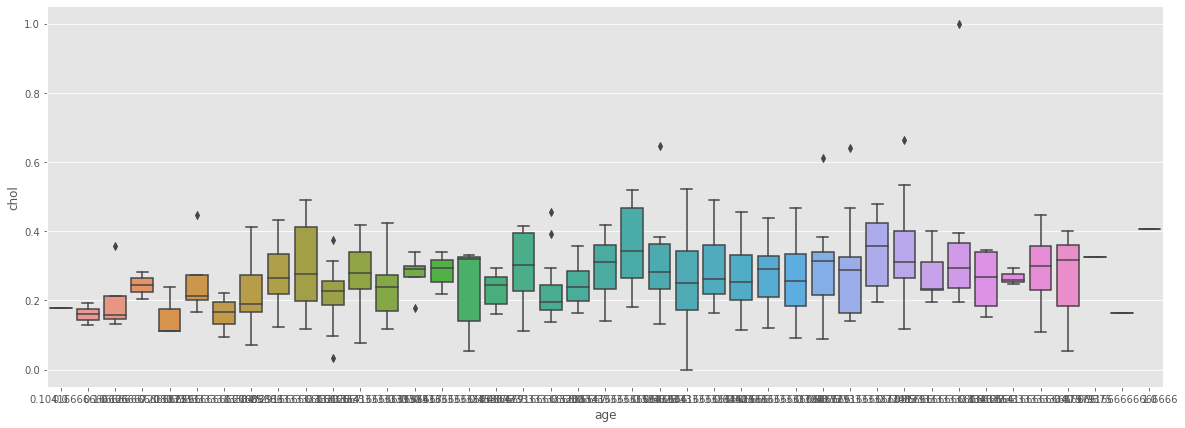

In [ ]:
plt.figure(figsize=(20,7))
plt.style.use('ggplot')
sns.boxplot(df['age'],df['chol'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


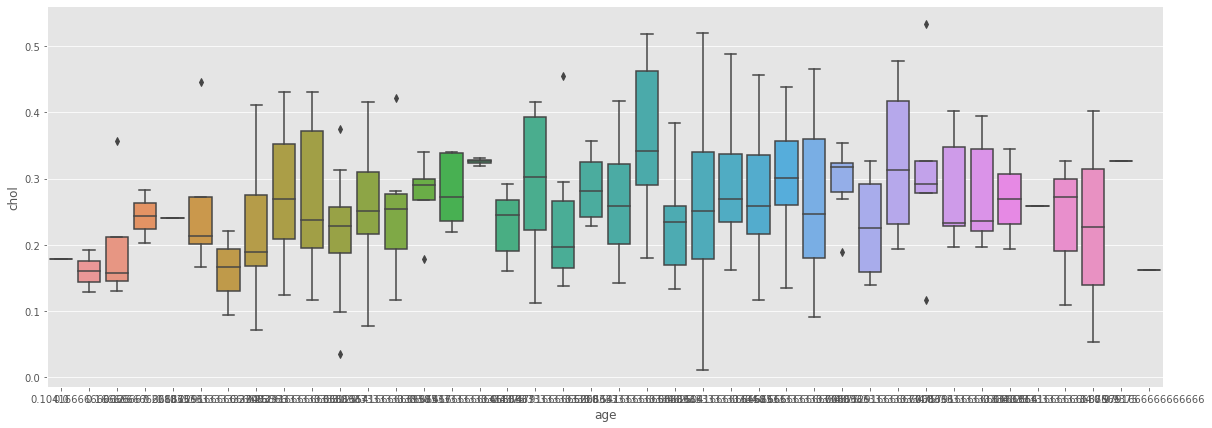

In [ ]:
plt.figure(figsize=(20,7))
plt.style.use('ggplot')
sns.boxplot(df_out['age'],df_out['chol'])
plt.show()

In [ ]:
x1=df_out[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
y1=df_out[['target']].values

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=34)
logreg = LogisticRegression(solver='liblinear')
#solver='liblinear'
logreg.fit(x1_train,y1_train)
score = logreg.score(x1_test,y1_test)*100
print("Score after applying Liblinear Solver",score)


Score after applying Liblinear Solver 86.95652173913044


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

y1_pred = logreg.predict(x1_test)
#y1_train = y1_train.flatten()
loss = log_loss( y1_test.flatten(),y1_pred)
print("Precision:",precision_score(y_test, y_pred))
#loss = Loss(y1_pred,y1_test.flatten())
print("Loss after applying Liblinear solver: ",loss)

Precision: 0.8157894736842105
Loss after applying Liblinear solver:  4.5050925557461845


Conclusion:- 
The log loss has reduced from a value of 10.19 before applying the solver to 4.5 after applying liblinear solver to the data ,  which indicates that compared to the other solvers, liblinear is the most opt for the given scenario